#Librerias automáticas


In [ ]:
#importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno

In [ ]:
#leemos el csv
df=pd.read_csv('/content/drive/MyDrive/plataformasUsuarioRating.csv',low_memory=False)

Las primeras columnas del data

In [ ]:
df.head(2)

show_id   type                title      director  \
0      s1  movie  the grand seduction  don mckellar   
1      s1  movie  the grand seduction  don mckellar   

                                             cast country date_added  \
0  brendan gleeson, taylor kitsch, gordon pinsent  canada 2021-03-30   
1  brendan gleeson, taylor kitsch, gordon pinsent  canada 2021-03-30   

   release_year rating duration      listed_in  \
0          2014      g  113 min  comedy, drama   
1          2014      g  113 min  comedy, drama   

                                         description   id  duration_int  \
0  a small fishing village must procure a local d...  as1         113.0   
1  a small fishing village must procure a local d...  as1         113.0   

  duration_type  userId  score  timestamp  
0           min     543    5.0 2003-07-30  
1           min     595    3.0 1996-08-13

In [ ]:
#El tamaño de nuestro data es mayor a 1.5GB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 18 columns):
 #   Column         Dtype         
---  ------         -----         
 0   show_id        object        
 1   type           object        
 2   title          object        
 3   director       object        
 4   cast           object        
 5   country        object        
 6   date_added     datetime64[ns]
 7   release_year   int64         
 8   rating         object        
 9   duration       object        
 10  listed_in      object        
 11  description    object        
 12  id             object        
 13  duration_int   float64       
 14  duration_type  object        
 15  userId         int64         
 16  score          float64       
 17  timestamp      datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(12)
memory usage: 1.5+ GB


In [ ]:
#Cambiamos el tipo de algunas de las columnas
df['date_added'] = pd.to_datetime(df['date_added'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
#Revisamos el tamaño del df
df.shape

(11024289, 18)

Eliminare duration_int y duration_type, porque esta informacion está dentro de la columna duration:

In [ ]:
df.drop(columns=['duration_type', 'duration_int'], inplace=True)

Revisamos la cantidad de nulos que tiene el data

In [ ]:
df.isna().sum()

show_id               0
type                  0
title                 0
director        3960615
cast            2550859
country         5510080
date_added      4577546
release_year          0
rating                0
duration          89483
listed_in             0
description        1815
id                    0
userId                0
score                 0
timestamp             0
dtype: int64

Revisamos los duplicados

In [ ]:
df.duplicated().sum()

10466

Eliminaremos los duplicados

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(11013823, 16)

Aun siguen siendo demasiados datos para las prestaciones de colab entonces seleccionare una muestra representativa para hacer el eda

In [ ]:
porcentaje = 0.1
indices_aleatorios = np.random.choice(len(df), size=int(len(df)*porcentaje), replace=False)
muestra = df.iloc[indices_aleatorios]

In [ ]:
muestra.shape

(1101382, 16)

In [ ]:
muestra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304146 entries, 10336820 to 7611579
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   show_id       object        
 1   type          object        
 2   title         object        
 3   director      object        
 4   cast          object        
 5   country       object        
 6   date_added    datetime64[ns]
 7   release_year  int64         
 8   rating        object        
 9   duration      object        
 10  listed_in     object        
 11  description   object        
 12  id            object        
 13  userId        int64         
 14  score         float64       
 15  timestamp     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(11)
memory usage: 428.5+ MB


#Comenzamos con pandas profiling

Como resultado ofrece un reporte en html.



In [ ]:
pip list

In [ ]:
from pandas_profiling import ProfileReport

design_report = ProfileReport(muestra)
design_report.to_file(output_file='report.html')

<ipython-input-8-3956c3af5b17>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#En caso de que exista un error recomendamos desinstalar e instalar de nuevo
#!pip uninstall -y pandas-profiling

# Vamos con una nueva libreria llamada sweetviz

Al igual que pandas profiling nos ofrece un reporte html 

In [ ]:
#tenemos que hacer la instalacion 
!pip install sweetviz

In [ ]:
#Utilizamos tambien el set de muestra
import sweetviz as sv
sweet_report = sv.analyze(muestra)
sweet_report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# La última libreria es autoviz
En este caso nos ofrece tanto un reporte que podemos guardar como un reporte en nuestras pantallas.

Algo importante a destacar es que toma más tiempo por los gráficos.

In [ ]:
#instalamos la libreria
!pip install autoviz

In [ ]:
#para guardar a csv
muestra.to_csv('muestra.csv', index=False) 

    max_rows_analyzed is smaller than dataset shape 1101382...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


    16 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for timestamp
All Plots done
Time to run AutoViz = 767 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


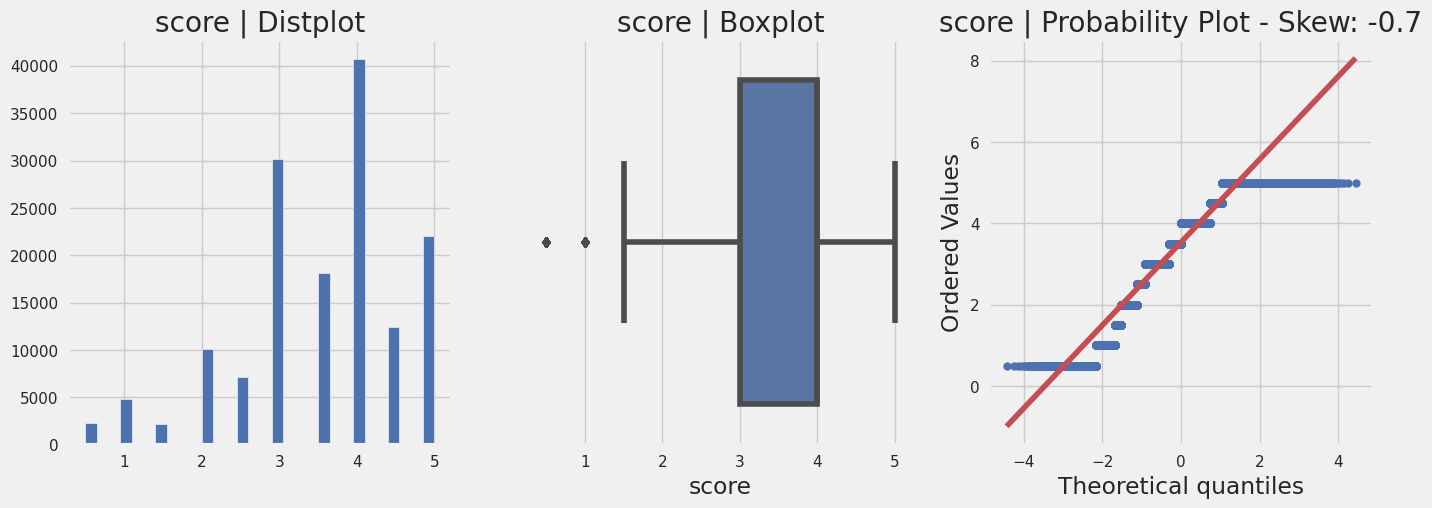

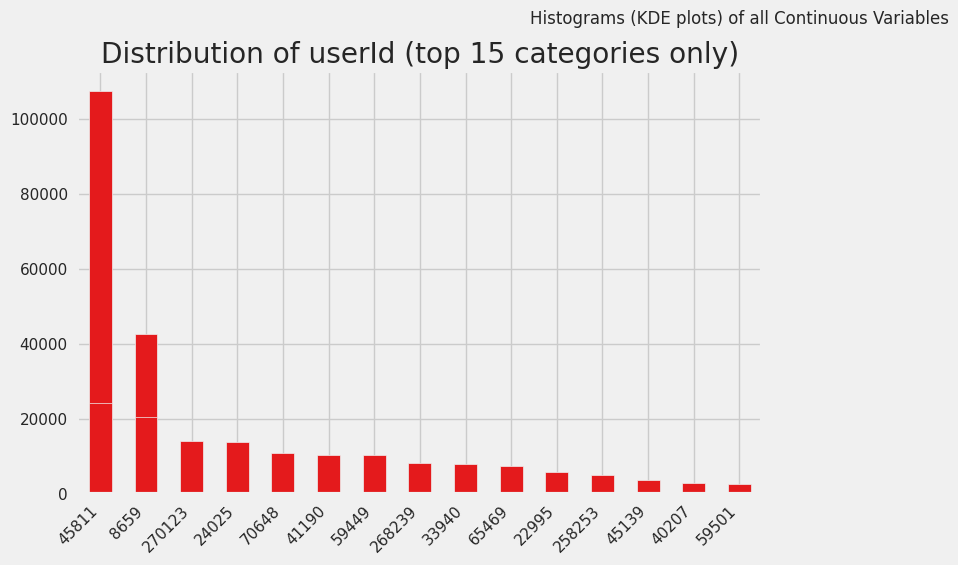

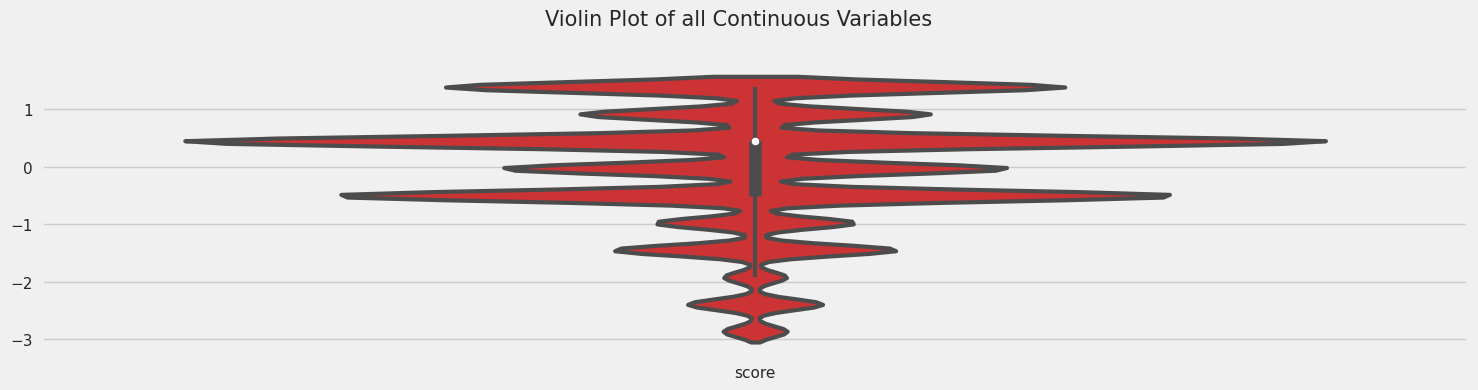

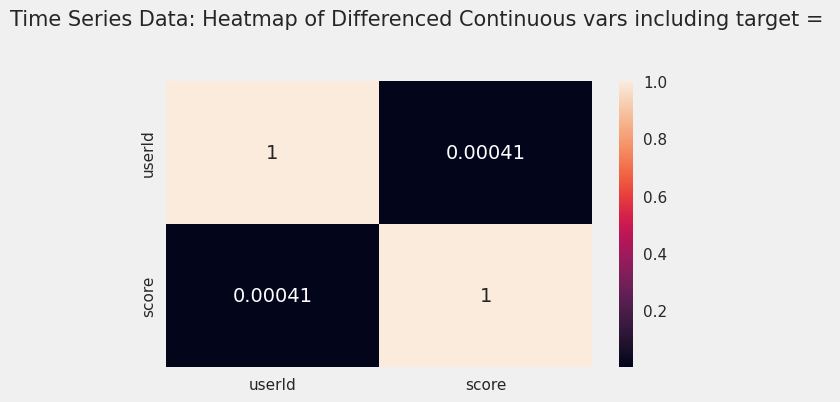

<Figure size 1500x0 with 0 Axes>

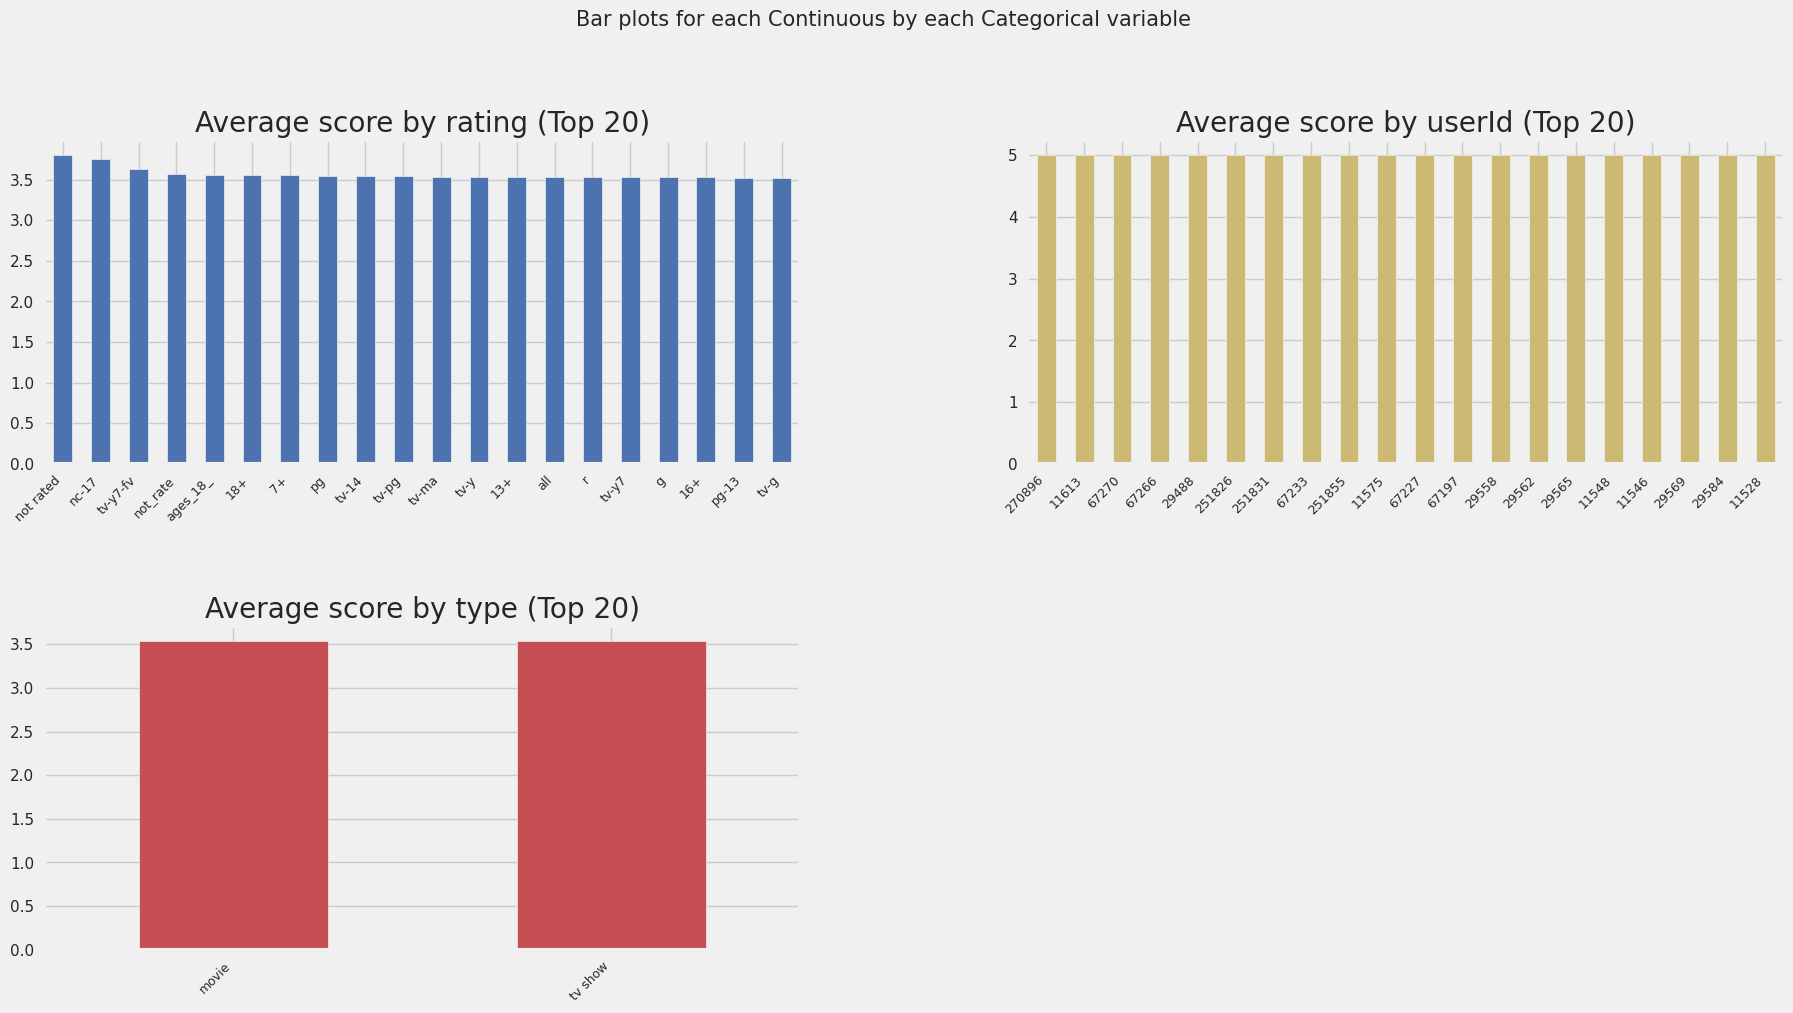

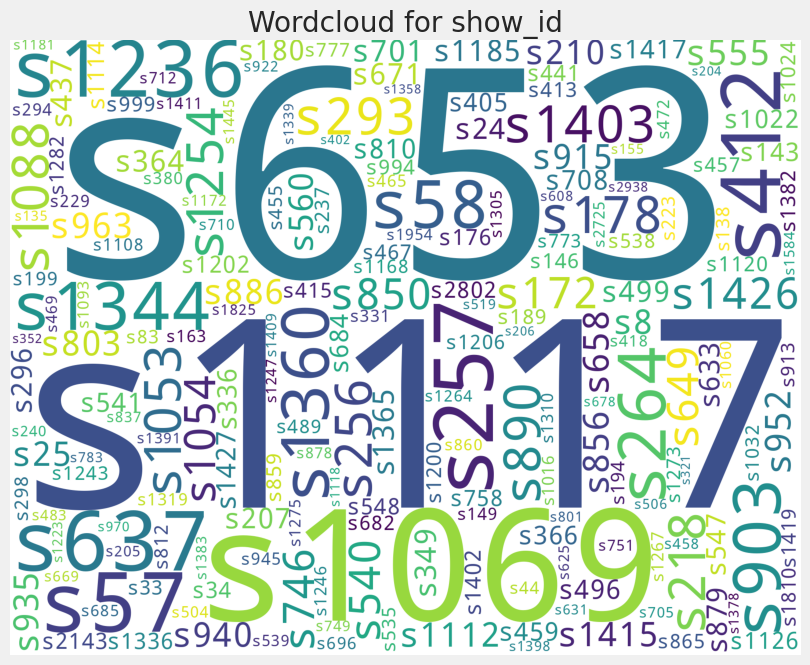

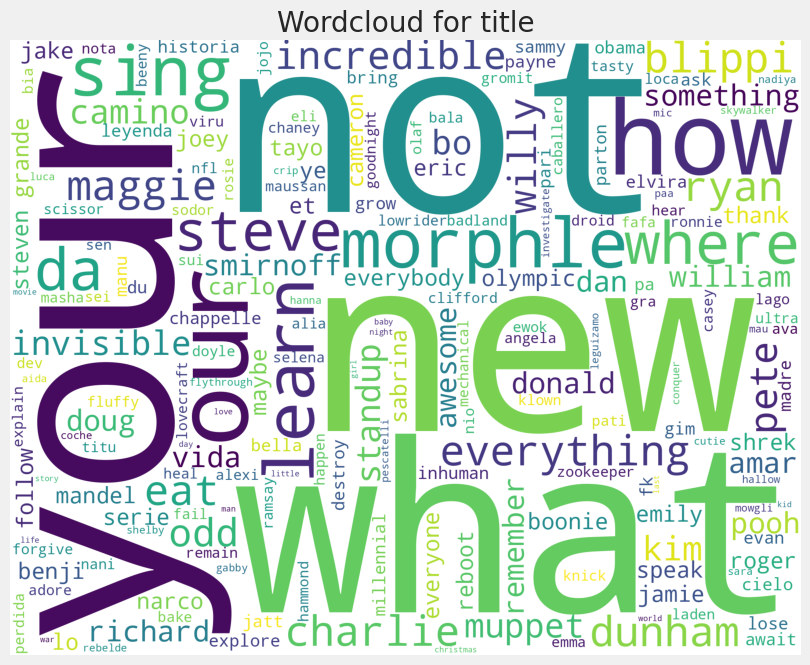

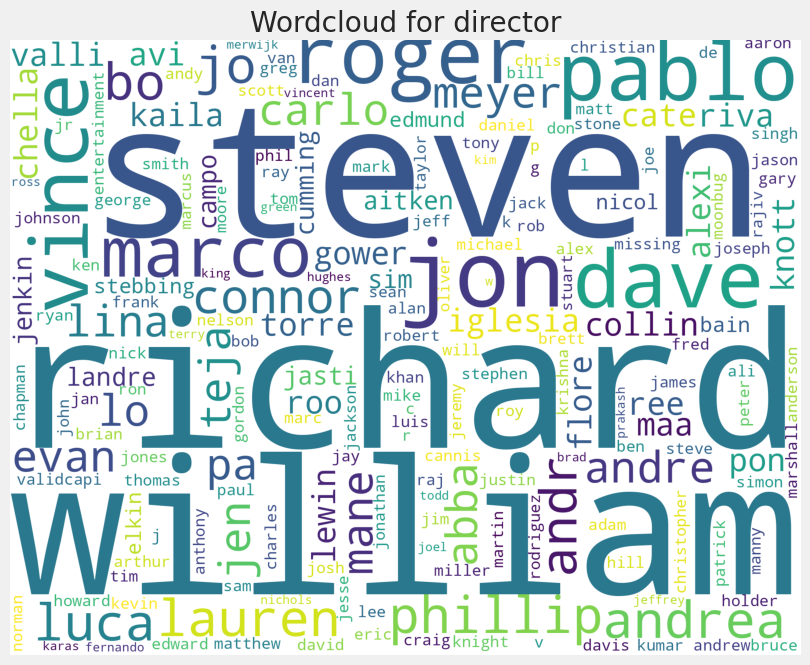

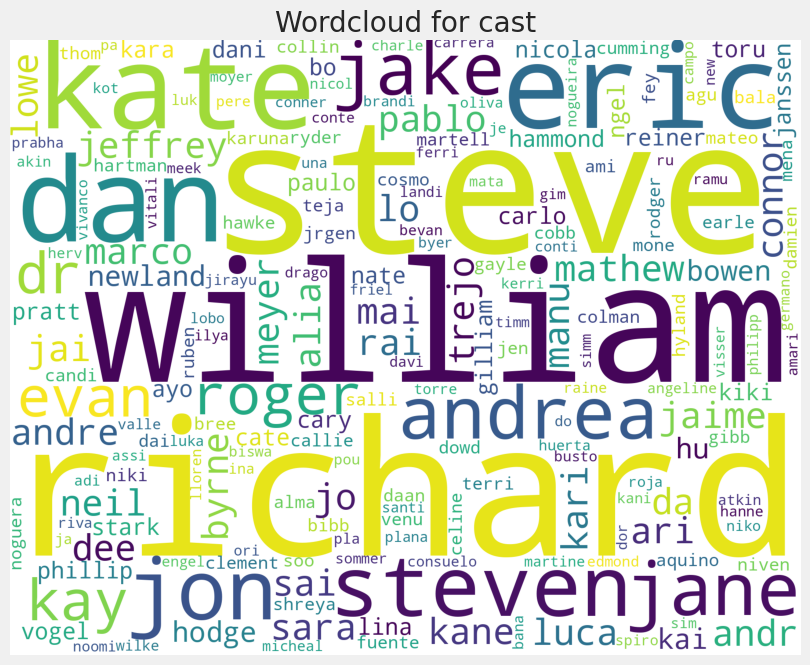

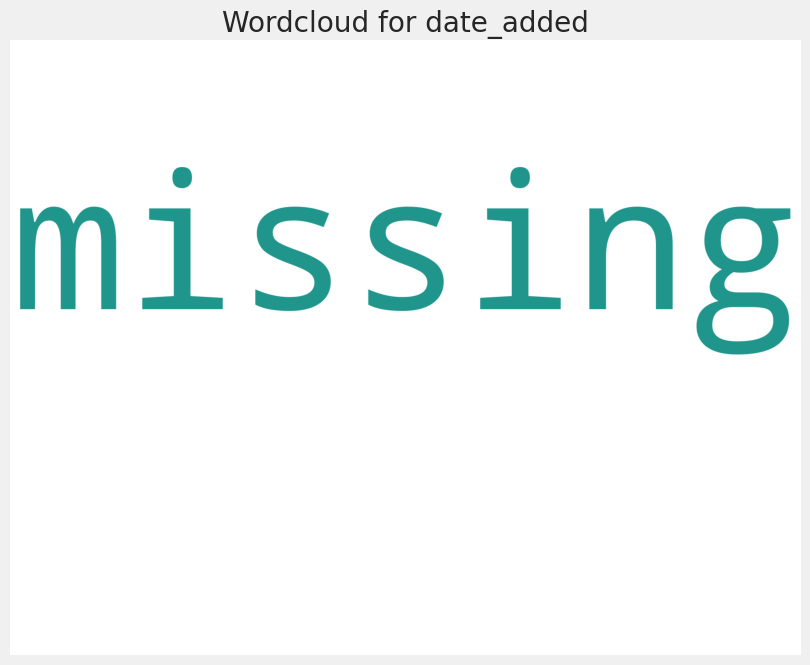

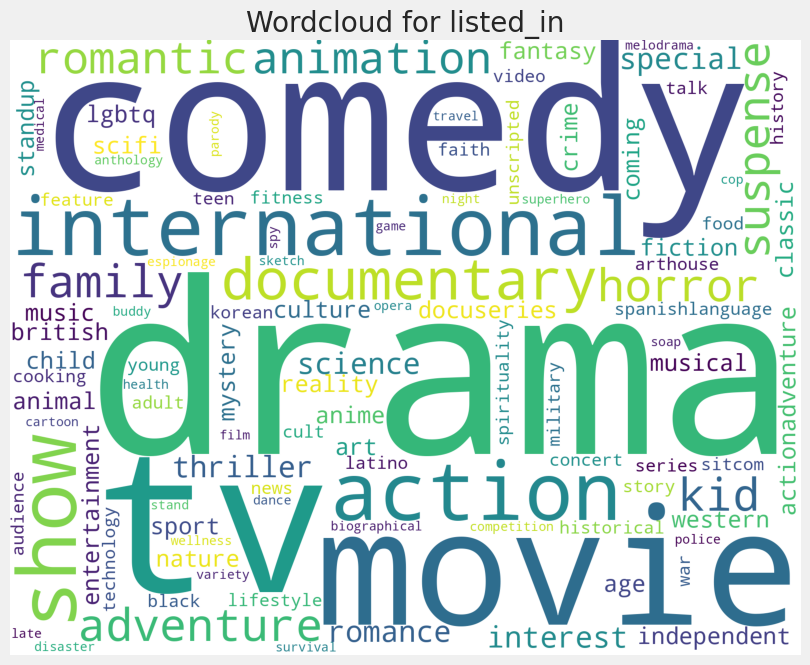

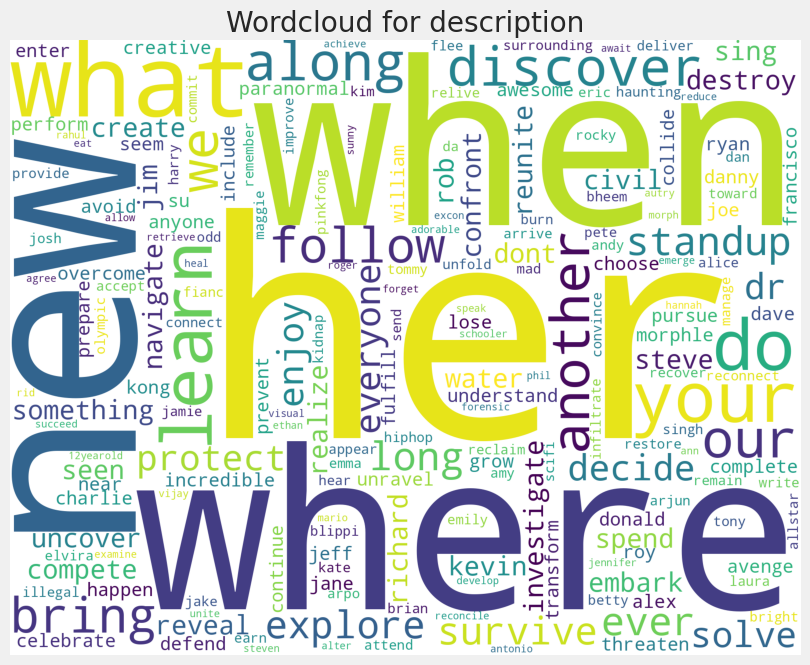

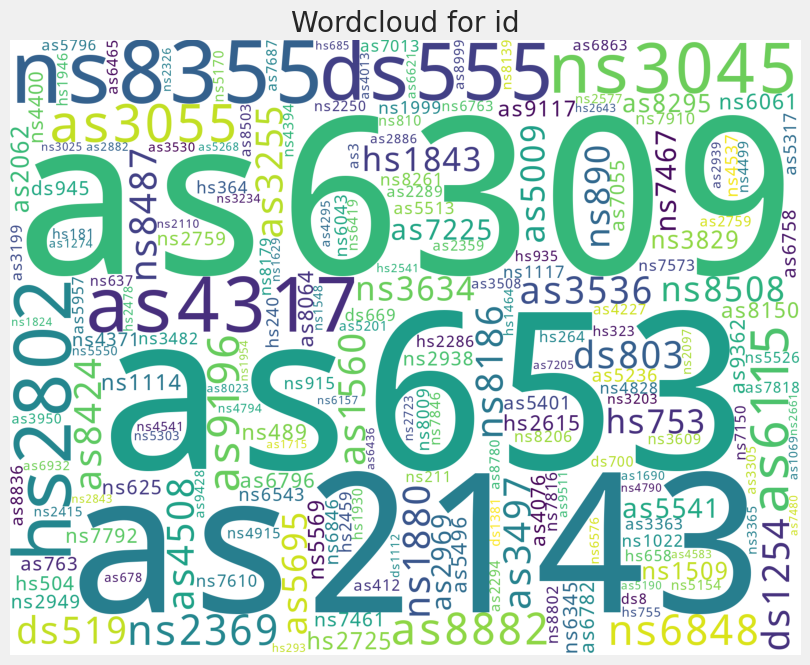

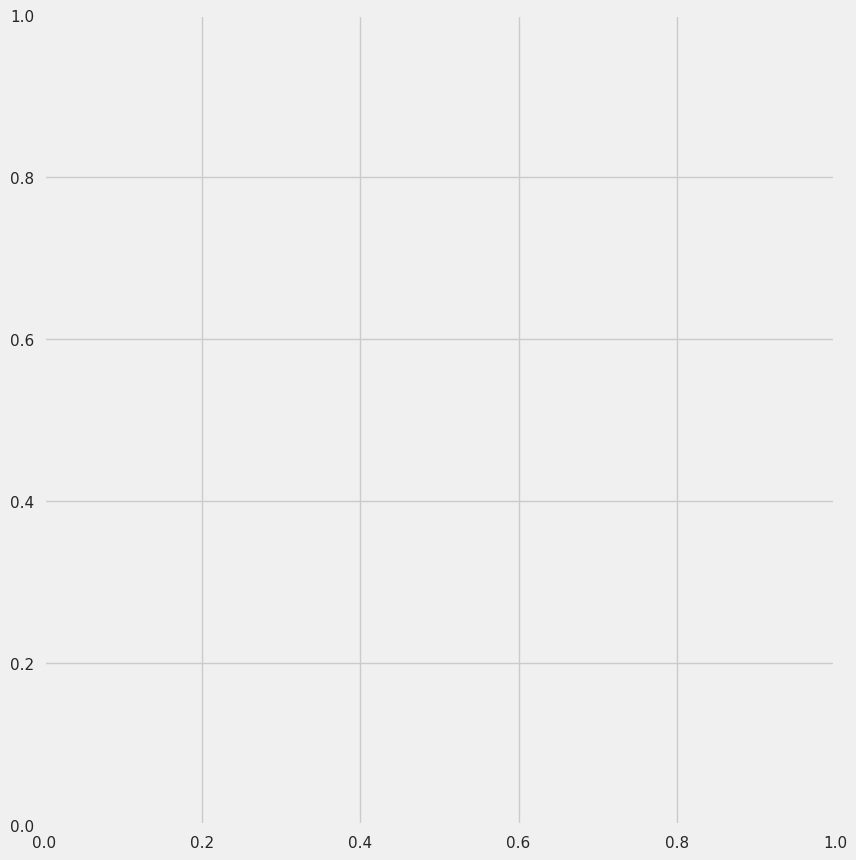

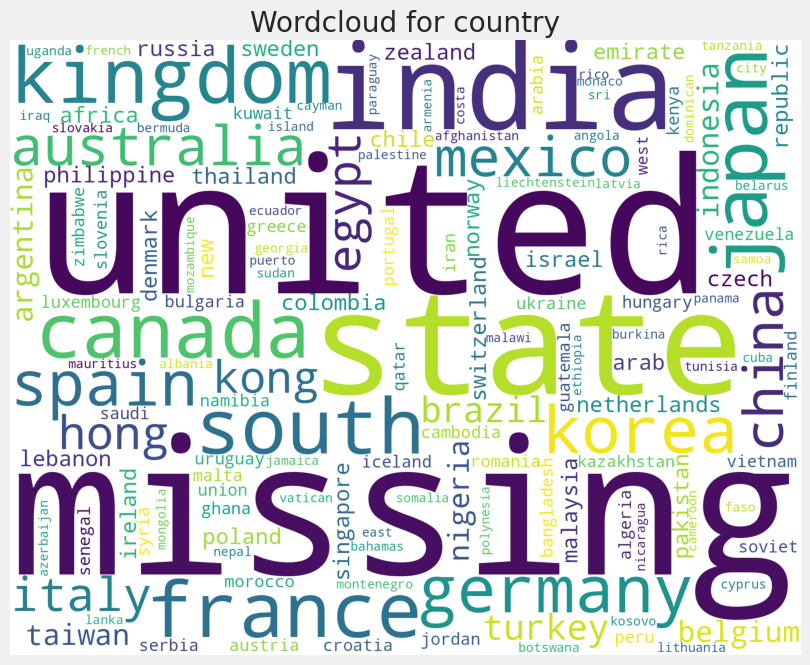

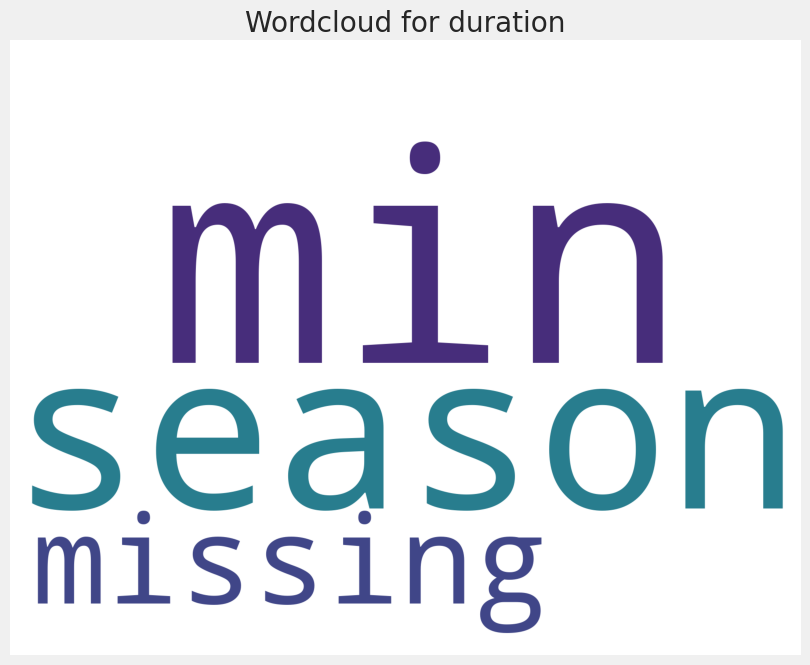

In [ ]:
# utilizamos el set de muestras
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('/content/muestra.csv')